# Implementing a Neural Network
In the following notebook we will implement a Neural Network, trying to develop a library like Keras. In order to do this, we must develop several classes to build our Network.

- **Dense.** Represent a layer with $N$ nuerons and $f(x)$ as the activation function.
- **Sequential.** Model in which we will define our architecture.
- **Optimizers.** Optimizer method, this class will help us in optimizing parameters such as weighs and bias. 

Note. The code of the previous classes can be seen at the **kerasNet.py**.

In [7]:
# Import data
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import tensorflow as tf

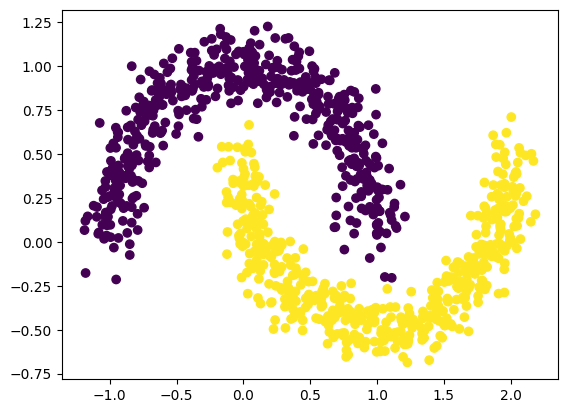

In [19]:
x_data, y_data = make_moons(n_samples= 1000, noise= 0.1)

plt.scatter(x= x_data[:, 0], y= x_data[:, 1], c = y_data)
plt.show()

In [20]:
# Data Preprocessing
st = StandardScaler()

x_vals = st.fit_transform(x_data)
y_vals = to_categorical(y_data)

In [21]:
from KerasNet import Dense, Sequential, Optimizers

In [24]:
# Neural Network
optimizer = Optimizers.RMSprop(learning_rate= 0.001, beta= 0.99)
model = Sequential(optimizer= optimizer)

model.add(Dense(units= 100, activation= 'relu', input_dim= 2))
model.add(Dense(units= 100, activation= 'relu'))
model.add(Dense(units= 100, activation= 'relu'))
model.add(Dense(units= 2, activation= 'softmax'))

model.fit(x_vals, y_vals, epochs= 10, batch_size= 50)

Epoch: 1 -- Loss: 2.696406364440918 -- Score: 0.8450000286102295
Epoch: 2 -- Loss: 1.0374877452850342 -- Score: 0.9279999732971191
Epoch: 3 -- Loss: 2.0916664600372314 -- Score: 0.8730000257492065
Epoch: 4 -- Loss: 0.17418210208415985 -- Score: 0.972000002861023
Epoch: 5 -- Loss: 0.2123173028230667 -- Score: 0.9789999723434448
Epoch: 6 -- Loss: 0.4975835382938385 -- Score: 0.9700000286102295
Epoch: 7 -- Loss: 0.05025405436754227 -- Score: 0.9940000176429749
Epoch: 8 -- Loss: 0.3167698383331299 -- Score: 0.9829999804496765
Epoch: 9 -- Loss: 0.14498527348041534 -- Score: 0.9829999804496765
Epoch: 10 -- Loss: 0.11475820094347 -- Score: 0.9909999966621399


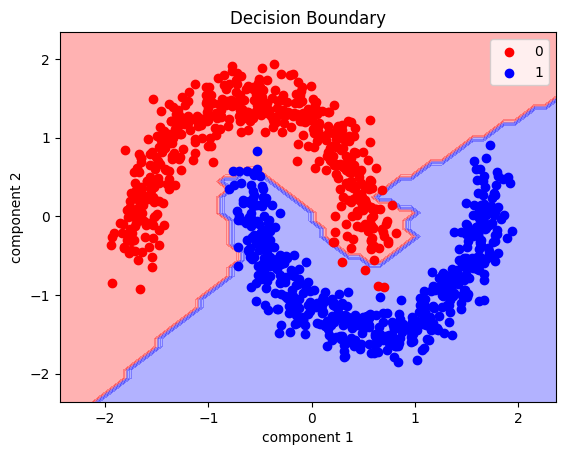

In [25]:
# Visualize Decision Boundary
x_set, y_set = x_vals, y_data
colors = ['red', 'blue']

X1, X2 = np.meshgrid(np.arange(min(x_set[:,0])-0.5, max(x_set[:,0])+0.5, 0.1),
                    np.arange(min(x_set[:,1])-0.5, max(x_set[:,1])+0.5, 0.1))

a = tf.constant(np.c_[X1.ravel(), X2.ravel()], dtype= tf.float32)
Z = model.predict(a).numpy().reshape(X1.shape)

plt.contourf(X1, X2, Z, alpha= 0.3, cmap= ListedColormap(('red','blue')))
for i, label in enumerate(np.unique(y_set)):
    plt.scatter(x= x_set[label == y_set, 0], y= x_set[label == y_set, 1],
                label= label, color= colors[i])

plt.title('Decision Boundary')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.legend()
plt.show()